In [4]:
!pip install pandas torch torchvision shap matplotlib scikit-learn 

In [5]:
!pip install -U pandasql

In [6]:
import shap
import pandasql as ps

In [7]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as ex
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


sns.set(style= 'whitegrid', color_codes=True)
import numpy as np # linear algebra
import pandas as pd #  pd.read_csv
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uk-dataset-accident-severity/UK_Accident.csv


In [9]:
df= pd.read_csv('/kaggle/input/uk-dataset-accident-severity/UK_Accident.csv')
# final_df = pd.concat(sub_sets)
final_df= df
final_df.shape
final_df.sample(4)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
1471486,432033,2.01E+12,556030.0,139770.0,0.228835,51.135886,46,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01024830,2014
218914,218914,200601WW50706,527070.0,173770.0,-0.172766,51.448613,1,3,2,2,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,No,E01004619,2006
833393,263382,201042I225707,617360.0,214330.0,1.150056,51.785334,42,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01022025,2010
23103,23103,200501XH30268,505590.0,181440.0,-0.479460,51.521964,1,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002413,2005


In [10]:
# Check unique values in the severity column
print(df['Accident_Severity'].unique())

[2 3 1]


In [11]:
# # Recode the severity column
# df['Accident_Severity'] = df['Accident_Severity'].map({1: 'Fatal', 2: 'Serious', 3: 'slight'})
# # Check the modified values
# print(df['Accident_Severity'].value_counts())

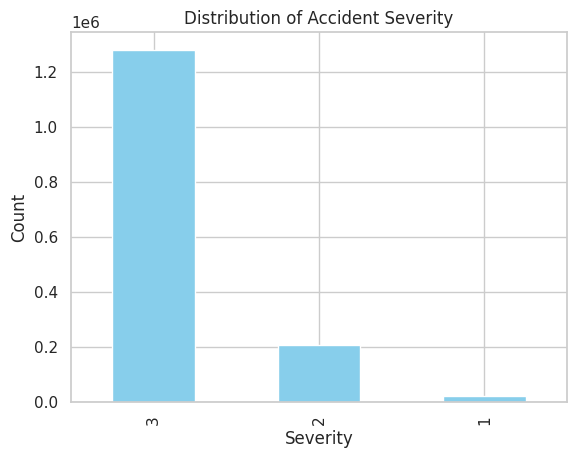

In [12]:

# Plot the severity distribution
df['Accident_Severity'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

In [13]:
df.isnull().sum()


Unnamed: 0                                           0
Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                               0
Longitude                                          101
Latitude                                             0
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limi

Accident_Severity
3    1280205
2     204504
1      19441
Name: count, dtype: int64


<Axes: xlabel='Accident_Severity'>

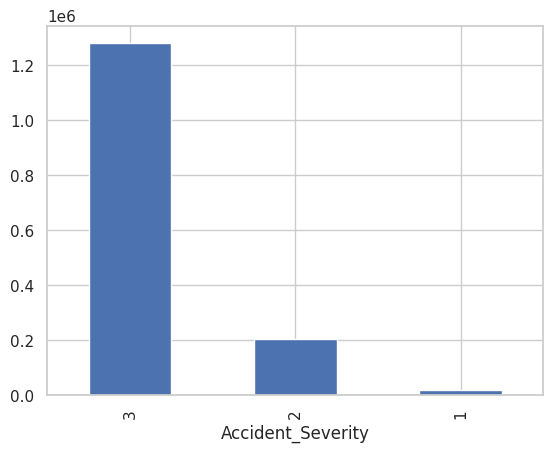

In [14]:
print(df['Accident_Severity'].value_counts())
df['Accident_Severity'].value_counts().plot(kind='bar')

Year
2005    198735
2006    189161
2007    182115
2012    179715
2009    163554
2010    154414
2011    151474
2014    146322
2013    138660
Name: count, dtype: int64
Accident_Severity
3    1280205
2     204504
1      19441
Name: count, dtype: int64


<Axes: xlabel='Year'>

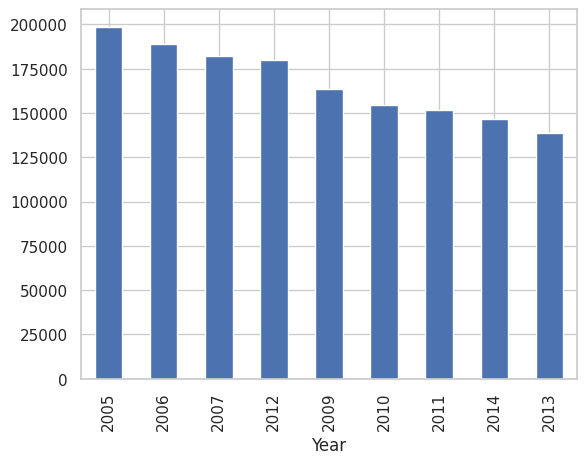

In [15]:
print(df['Year'].value_counts())
print(df['Accident_Severity'].value_counts())
df['Year'].value_counts().plot(kind='bar')

In [16]:
# Define number of Factor
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [17]:
final_df['Year'].unique()
final_df
# drop column doesn't contribute anything
final_df['Road_Surface_Conditions'].fillna(value = 'Normal', inplace = True)
final_df['Special_Conditions_at_Site'].fillna(value = 'None', inplace = True)
final_df['Carriageway_Hazards'].fillna(value = 'None', inplace = True)
final_df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(value = 'No', inplace = True)
final_df['Weather_Conditions'].fillna(value = 'Unknown', inplace = True)
final_df['Junction_Control'].fillna(value = 'None', inplace = True)
final_df['Location_Northing_OSGR'].fillna(value = 0, inplace = True)
final_df['Latitude'].fillna(value = 0, inplace = True)
data = {'Casualties_Count' : final_df['Number_of_Casualties'],
             'Day_of_Week' : final_df['Day_of_Week']}
accidents_per_week = pd.DataFrame(data)
accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A valu

,Casualties_Count
Day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


In [18]:
cas_count= accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

In [19]:
# getting group-by size for sorting of color intensity according to Count values
size_gb= accidents_per_week.groupby(by='Day_of_Week').size()
dev_color= size_gb.argsort().argsort() # argsort for index wise sorting
pal= sns.color_palette('Greens', len(dev_color)) # choose color palette accordingly

<Axes: xlabel='Day_of_Week', ylabel='count'>

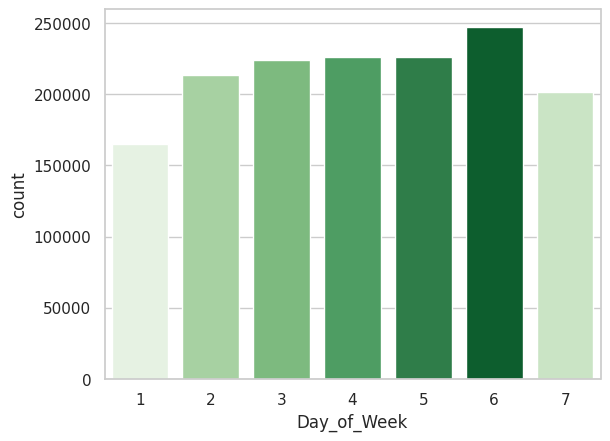

In [20]:
sns.countplot(x=accidents_per_week.Day_of_Week, 
              data=accidents_per_week,
              palette=np.array(pal[::])[dev_color]) 
# 6th day of the week has seen more number of accidents

In [21]:
# On each day of the week, what is the maximum and minimum speed limit on the roads the accidents happened?
accidents_per_week['Speed_Limit'] = final_df.Speed_limit
accidents_per_week.sample(4)

,Casualties_Count,Day_of_Week,Speed_Limit
465042,1,3,30
1424204,1,4,30
190760,1,6,60
1432270,1,4,60


In [22]:
chunks = []
for val in range(1,8) : # Since there are 7 days, we're using the loop from 1 to 8.
    qurery1 = """select accidents_per_week.Day_of_Week, sum(accidents_per_week.Casualties_Count) Casualties_Count,
            max(accidents_per_week.Speed_Limit) Max_Speed ,min(accidents_per_week.Speed_Limit) Min_Speed
            from accidents_per_week where accidents_per_week.Casualties_Count > 0 and accidents_per_week.Day_of_Week= """+str(val)
    chunks.append(ps.sqldf(qurery1, locals())) # parameters (Query, db_url) and returns DataFrame
    
speed_limit_accident_data = pd.concat(chunks, ignore_index=True) # concatination of chunks

In [23]:
speed_limit_accident_data

,Day_of_Week,Casualties_Count,Max_Speed,Min_Speed
0,1,239532,70,10
1,2,284043,70,10
2,3,294476,70,10
3,4,297756,70,20
4,5,299044,70,10
5,6,331934,70,10
6,7,285261,70,10


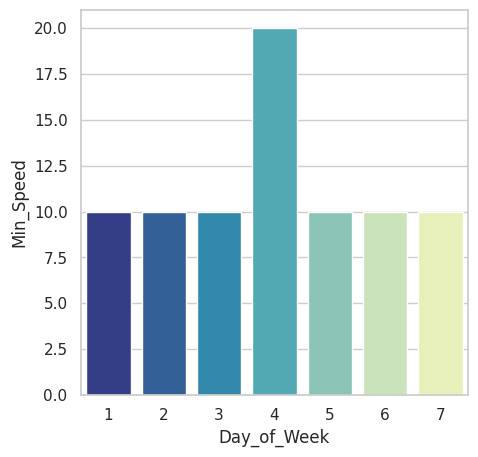

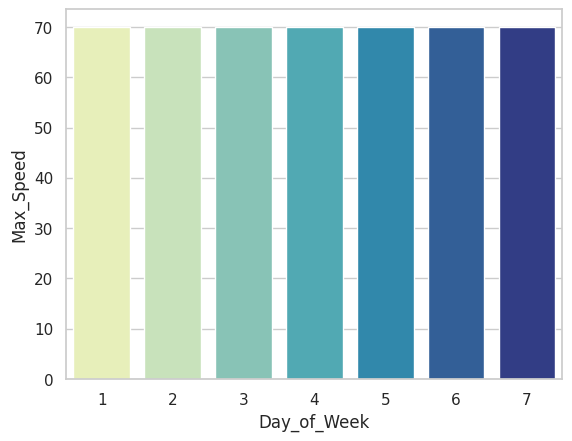

In [24]:
val = ["Max-Speed","Min_Speed"]
plt.figure(figsize=(5,5))
sns.barplot(x='Day_of_Week', y = 'Min_Speed' , data=speed_limit_accident_data, palette='YlGnBu_r')
plt.show()
sns.barplot(x='Day_of_Week', y = 'Max_Speed' , data=speed_limit_accident_data, palette='YlGnBu')
plt.show()

In [25]:
# What is the importance of Light and Weather cdt in predicting accident severity
# What does your intuition say and what does the data representtion
accident_severity_data = {'Light_Conditions' : final_df.Light_Conditions, 
                          'Weather_Conditions' : final_df.Weather_Conditions,
                          'Accident_Severity' : final_df.Accident_Severity}
accident_severity_df = pd.DataFrame(accident_severity_data)
accident_severity_df.sample(4)

,Light_Conditions,Weather_Conditions,Accident_Severity
903877,Daylight: Street light present,Fine without high winds,3
1304255,Darkness: Street lights present and lit,Other,3
1360534,Darkness: Street lights present and lit,Fine without high winds,3
703156,Daylight: Street light present,Fine without high winds,3


In [26]:
print(accident_severity_df.describe(),'\n')
print(accident_severity_df.info())
# Converting Object data-type into Category datatype
for object_feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
     accident_severity_df[object_feature] = accident_severity_df[object_feature].astype('category')
accident_severity_df.info()

       Accident_Severity
count       1.504150e+06
mean        2.838190e+00
std         4.018423e-01
min         1.000000e+00
25%         3.000000e+00
50%         3.000000e+00
75%         3.000000e+00
max         3.000000e+00 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Light_Conditions    1504150 non-null  object
 1   Weather_Conditions  1504150 non-null  object
 2   Accident_Severity   1504150 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 34.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   Light_Conditions    1504150 non-null  category
 1   Weather_Conditions  1504150 non-null  category
 2   Accident_Severity   1504150 no

In [27]:
# One Hot Encoding the categorical columns
accident_severity_df = pd.get_dummies(data=accident_severity_df, columns=['Light_Conditions', 'Weather_Conditions'])
accident_severity_df.sample(2)
# Correlation between 'Accident_Severity' and rest of variables
accident_severity = accident_severity_df.corr().loc['Accident_Severity':] 
accident_severity = pd.DataFrame(accident_severity)
# np.hstack(np.split(accident_severity, 1))
accident_severity

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
Accident_Severity,1.000000,-0.071174,0.002657,-0.018362,-0.003769,0.053096,-0.005982,-0.025910,-0.004042,0.012961,0.000549,0.018437,0.003080,0.010913,0.017108
Light_Conditions_Darkeness: No street lighting,-0.071174,1.000000,-0.025083,-0.119369,-0.016370,-0.399076,0.018572,-0.074911,0.058249,0.037683,0.048193,0.033486,0.028193,0.031123,-0.015329
Light_Conditions_Darkness: Street lighting unknown,0.002657,-0.025083,1.000000,-0.051555,-0.007070,-0.172360,-0.002335,-0.044742,0.005986,0.002229,0.000384,-0.006382,0.000715,0.003057,0.140243
Light_Conditions_Darkness: Street lights present and lit,-0.018362,-0.119369,-0.051555,1.000000,-0.033648,-0.820269,0.006970,-0.093839,0.011799,0.031787,0.041990,0.081967,0.001151,0.016986,-0.012381
Light_Conditions_Darkness: Street lights present but unlit,-0.003769,-0.016370,-0.007070,-0.033648,1.000000,-0.112492,0.003017,-0.018033,0.005796,0.008136,0.010302,0.012519,0.002725,0.001946,-0.001917
Light_Conditions_Daylight: Street light present,0.053096,-0.399076,-0.172360,-0.820269,-0.112492,1.000000,-0.015741,0.136071,-0.042865,-0.049729,-0.064212,-0.091339,-0.016129,-0.032296,-0.013322
Weather_Conditions_Fine with high winds,-0.005982,0.018572,-0.002335,0.006970,0.003017,-0.015741,1.000000,-0.222582,-0.008224,-0.016776,-0.013166,-0.040677,-0.004015,-0.009670,-0.015425
Weather_Conditions_Fine without high winds,-0.025910,-0.074911,-0.044742,-0.093839,-0.018033,0.136071,-0.222582,1.000000,-0.148175,-0.302260,-0.237214,-0.732891,-0.072337,-0.174238,-0.277918
Weather_Conditions_Fog or mist,-0.004042,0.058249,0.005986,0.011799,0.005796,-0.042865,-0.008224,-0.148175,1.000000,-0.011168,-0.008765,-0.027079,-0.002673,-0.006438,-0.010268
Weather_Conditions_Other,0.012961,0.037683,0.002229,0.031787,0.008136,-0.049729,-0.016776,-0.302260,-0.011168,1.000000,-0.017879,-0.055238,-0.005452,-0.013132,-0.020947


<Axes: >

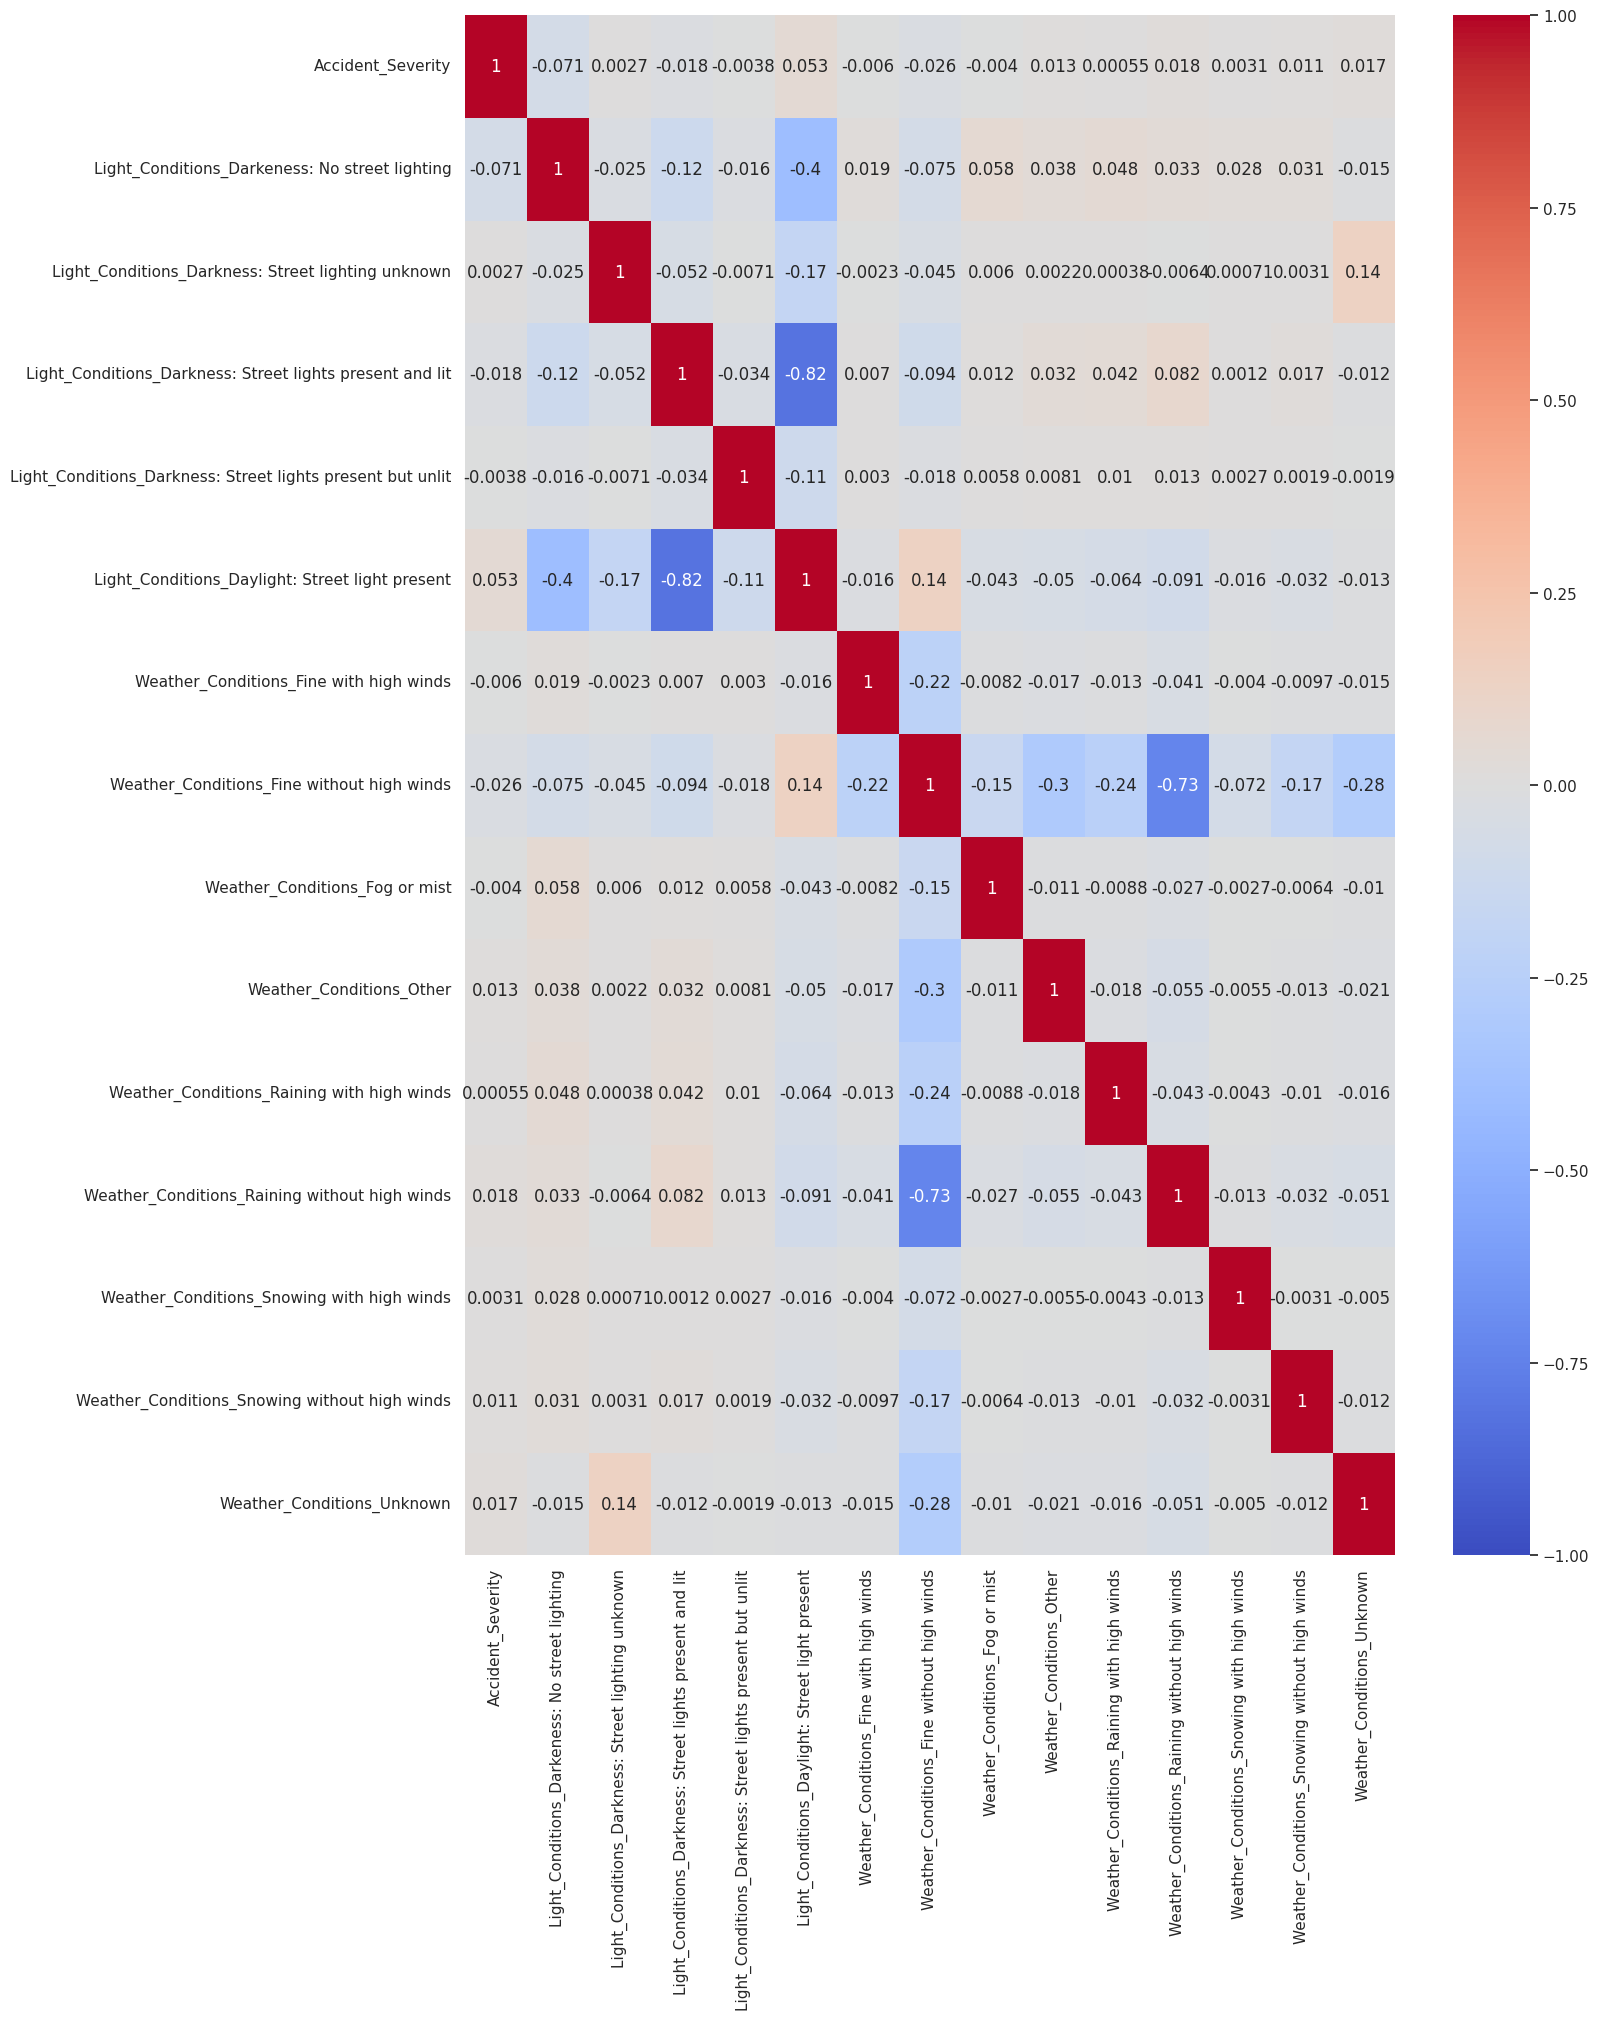

In [28]:
plt.figure(figsize=(15,20))
sns.heatmap(accident_severity, vmin=-1, cmap='coolwarm', annot = True)

In [29]:
# It is reasonable to assert that the frequency of accidents tends to increase under adverse light and weather conditions. For instance, the absence of illumination at night may lead to a higher incidence of accidents. Similarly, inclement weather, characterized by strong winds, heavy rainfall, or snowfall, can contribute to an elevated number of accidents.

# Analyzing the correlation matrix of the data reveals that both Light_conditions and Weather_Conditions have a minimal impact on Accident_severity, as their correlation coefficients are nearly zero. Notably, the presence of street lighting appears to exert a more significant influence than weather conditions.

# Thus, one could interpret that the presence of street lighting, in comparison to daylight conditions, correlates with a greater number of accidents and an increase in their severity.

In [30]:
# To predict the severity of the accidents which columns are unnecessary as logically and should be dropped
# From the above correlation, we have seen that Light_Conditions and Weather_Conditions are not much impactful,
# so we can drop them
accident_severity_df =final_df.copy()
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [31]:
accident_severity_df['Pedestrian_Crossing-Human_Control'].value_counts() 
accident_severity_df['Pedestrian_Crossing-Physical_Facilities'].value_counts() 
accident_severity_df['Light_Conditions'].value_counts() 
accident_severity_df['Special_Conditions_at_Site'].value_counts() 
accident_severity_df['Carriageway_Hazards'].value_counts()
accident_severity_df['Junction_Control'].value_counts()

Junction_Control
Giveway or uncontrolled     733940
None                        602835
Automatic traffic signal    155717
Stop Sign                     9179
Authorised person             2479
Name: count, dtype: int64

In [32]:
   def summary_categorical_dist(df_data, col):
    
    fig = plt.figure(figsize = (8, 4), facecolor = "white")

    layout_plot = (1, 2)
    num_subplot = 2
    axes = [None for _ in range(num_subplot)]
    list_shape_subplot = [[(0, 0), (0, 1)], [1, 1], [1, 1]]
    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )
    
    count = df_data[col].value_counts().sort_index()
    
    sns.countplot(data = df_data, y = col, order = count.index, ax = axes[0])
    axes[1].pie(data = df_data, x = count, labels = count.index, autopct = '%1.1f%%', startangle = 90)
    
    list_title = ["Counts", "Proportions"]
    for i in range(num_subplot):
        axes[i].set_title(list_title[i])
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

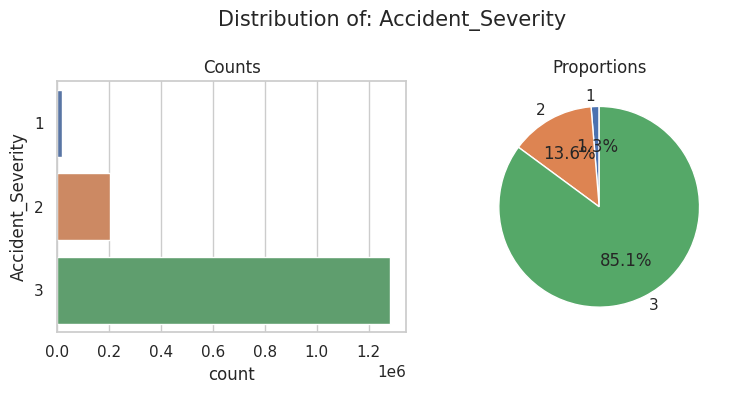

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


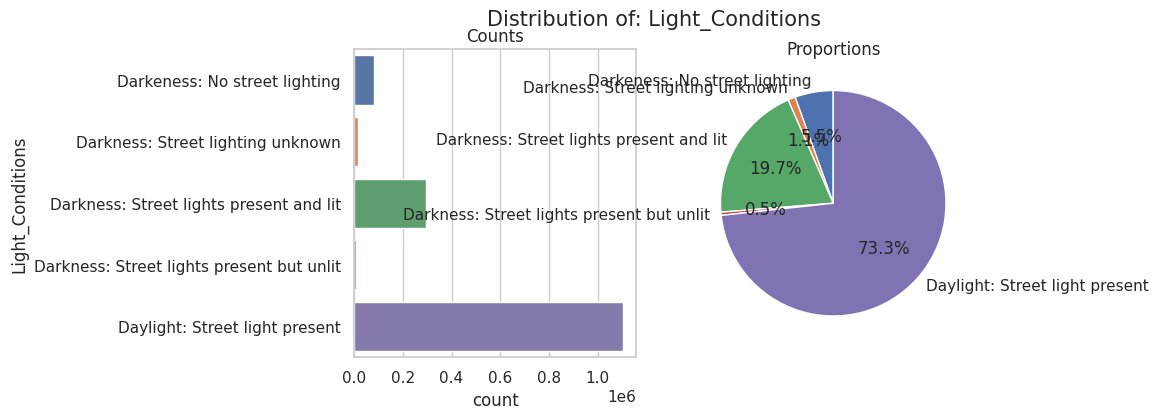

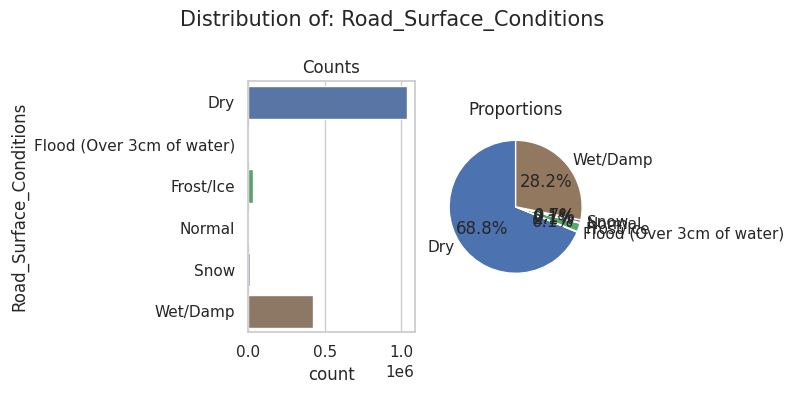

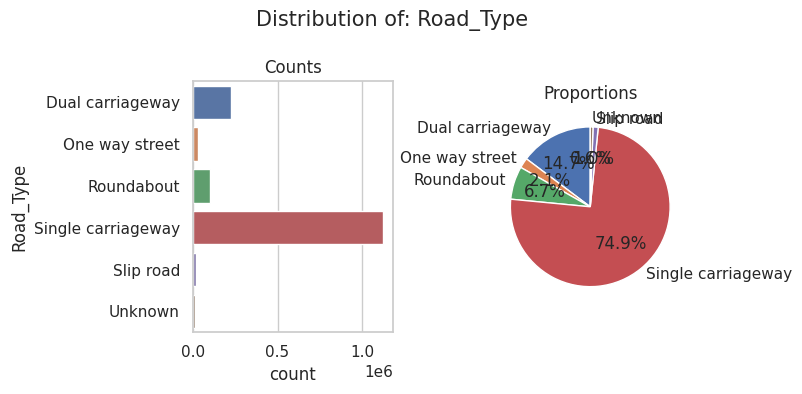

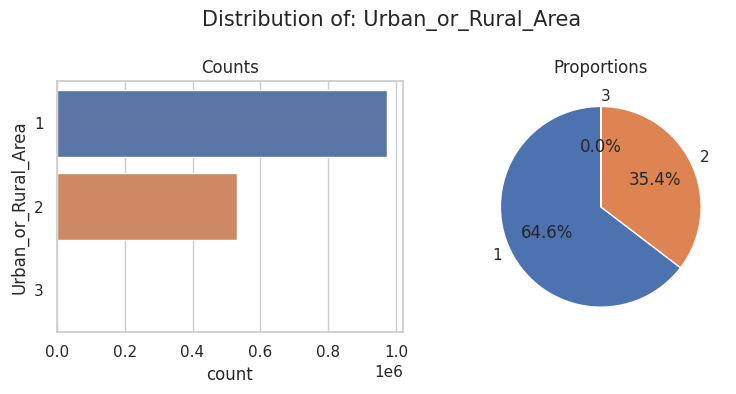

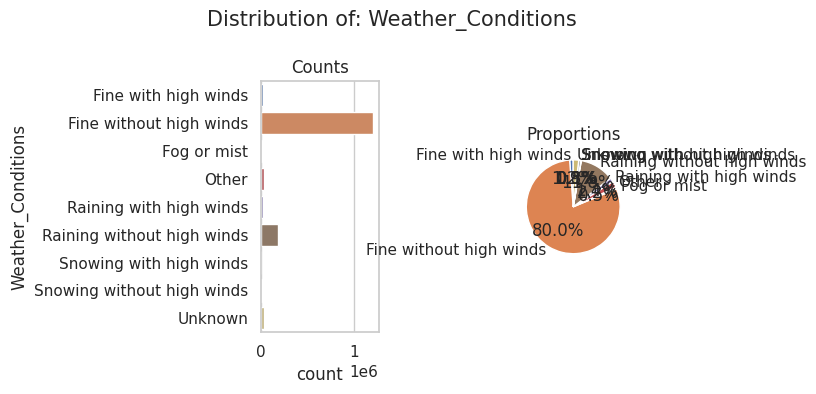

In [33]:
summary_categorical_dist(df, 'Accident_Severity')
summary_categorical_dist(df, 'Light_Conditions')
summary_categorical_dist(df, 'Road_Surface_Conditions')
summary_categorical_dist(df, 'Road_Type')
summary_categorical_dist(df, 'Urban_or_Rural_Area')
summary_categorical_dist(df, 'Weather_Conditions')

In [34]:
# Pedestrian_Crossing can be dropped as almost 90% of the data is None
# Pedestrian_Crossing-Physical_Facilities can be dropped as almost 80% of the data is None
# Light_Conditions can be dropped as earlier we have seen Light_Conditions & Weather_Conditions are not much impactful
# Special_Conditions_at_Site can be dropped as 90% data is None
# Carriageway_Hazards can be dropped as 90% data is None
# Did_Police_Officer_Attend_Scene_of_Accident can be dropped as Police comes after the accident has occured and it doesn't logically impact the severity of the accident
# Carriageway_Hazards can be dropped as 90% data is None
# We can also drop Accident_Index as it only keeps the count of the accidents
# We can also drop Date, Time of Accidents as logically they don't impact the Severity of Accidents

<Axes: xlabel='Road_Type', ylabel='Accident_Severity'>

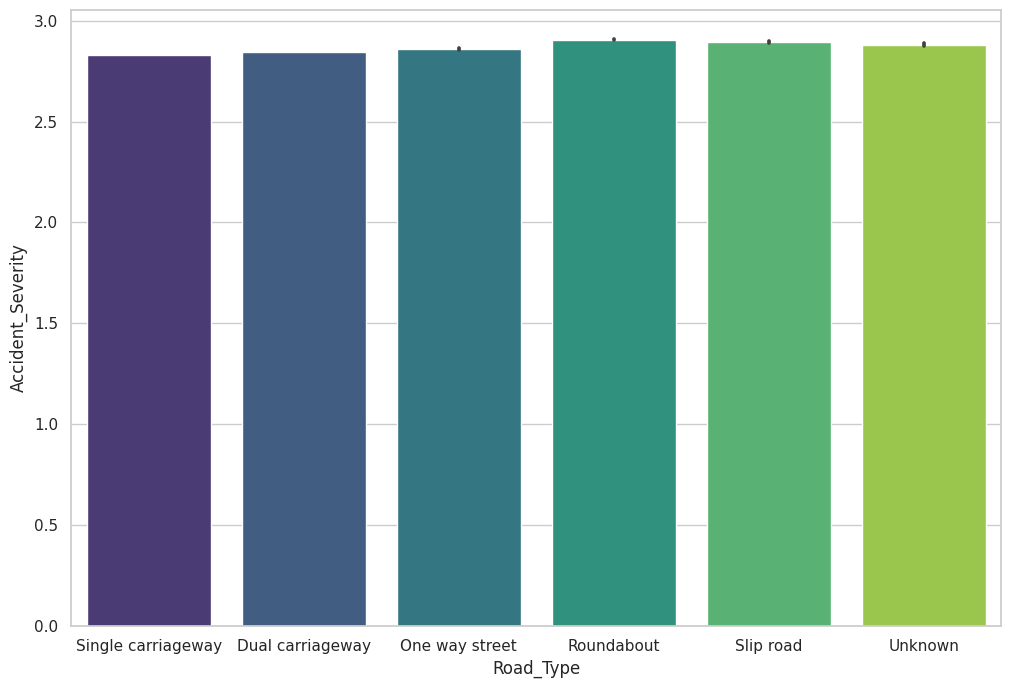

In [35]:
drop_cols= ['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions'
           ,'Special_Conditions_at_Site','Carriageway_Hazards','Carriageway_Hazards','Junction_Control'
           ,'Did_Police_Officer_Attend_Scene_of_Accident']
plt.figure(figsize=(12,8))
sns.barplot(x = 'Road_Type', y = 'Accident_Severity', data = accident_severity_df, palette='viridis')

<Axes: xlabel='Road_Surface_Conditions', ylabel='Accident_Severity'>

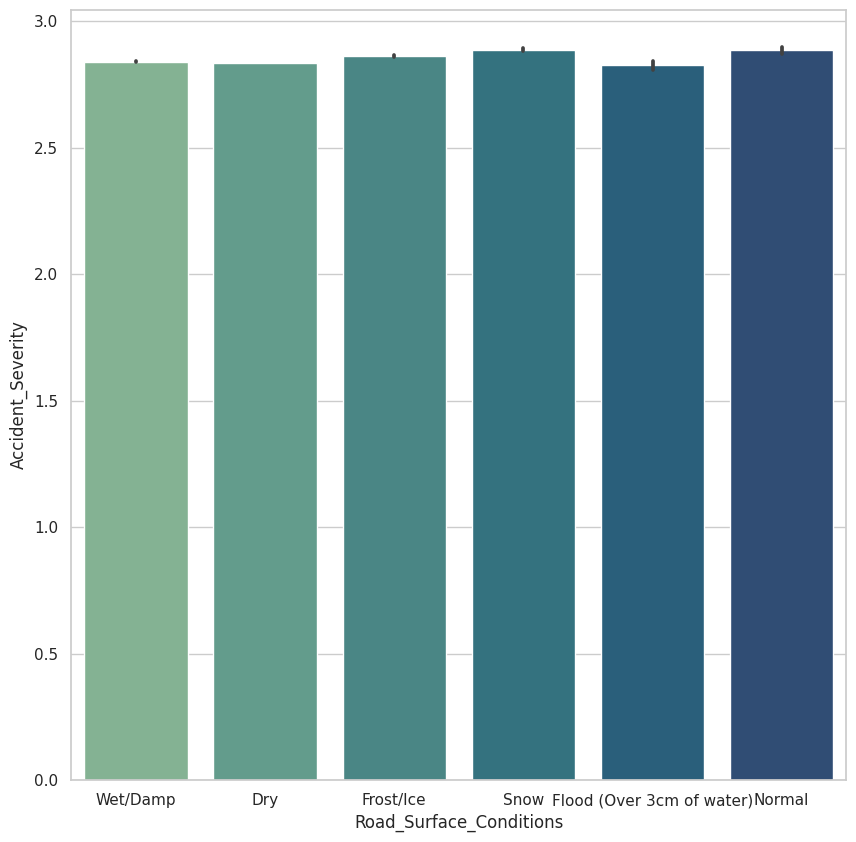

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Road_Surface_Conditions', y = 'Accident_Severity', data = accident_severity_df, palette='crest')

In [37]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
    accident_severity_df.drop(columns = feature, inplace = True)
    accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504150 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504150 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

<Axes: >

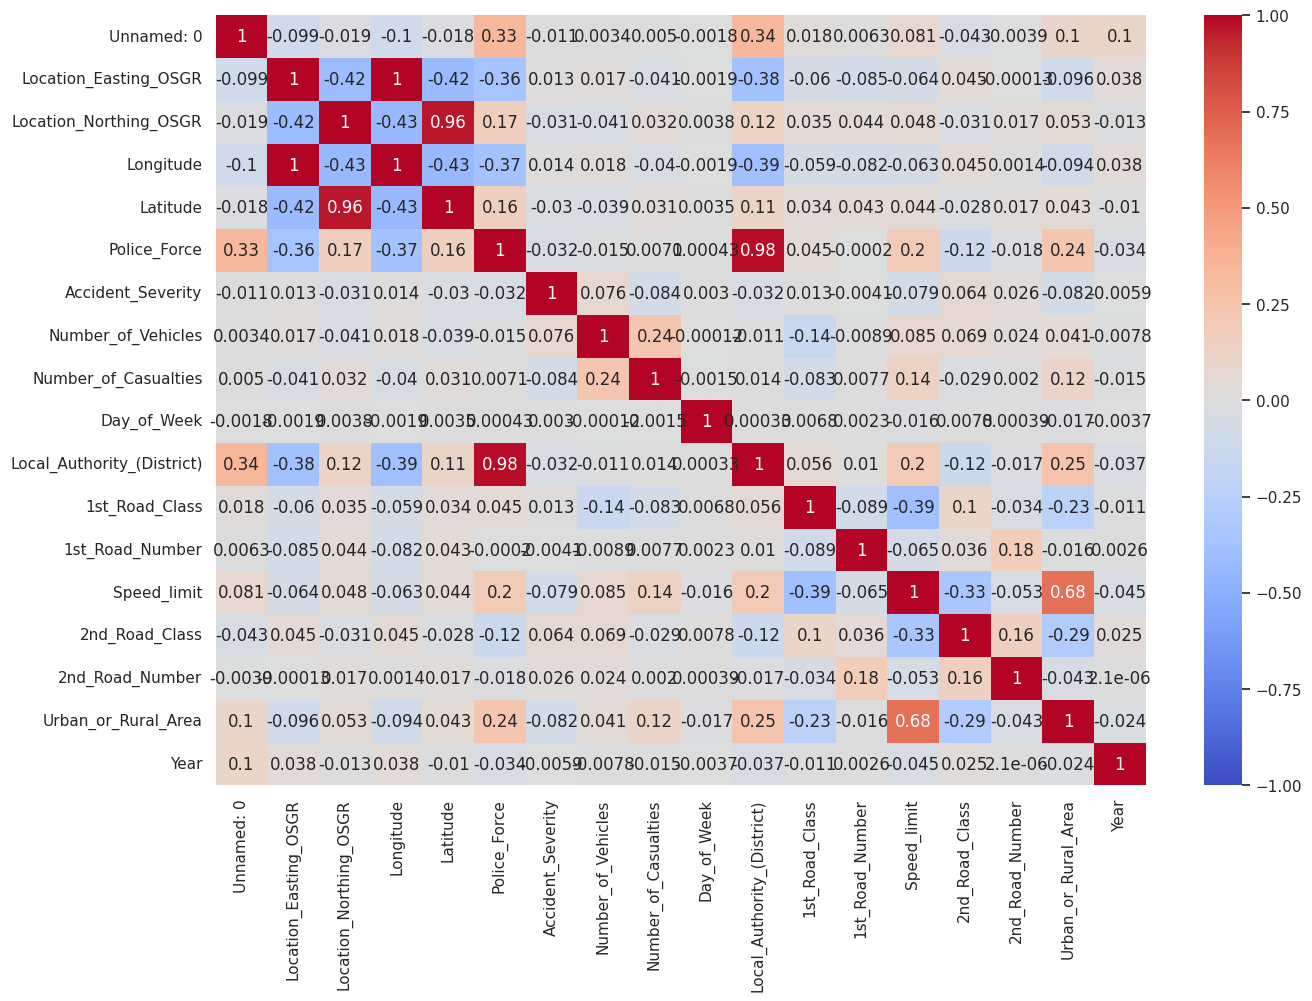

In [43]:
corr_matrix = accident_severity_df.corr()
corr_matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, cmap='coolwarm')


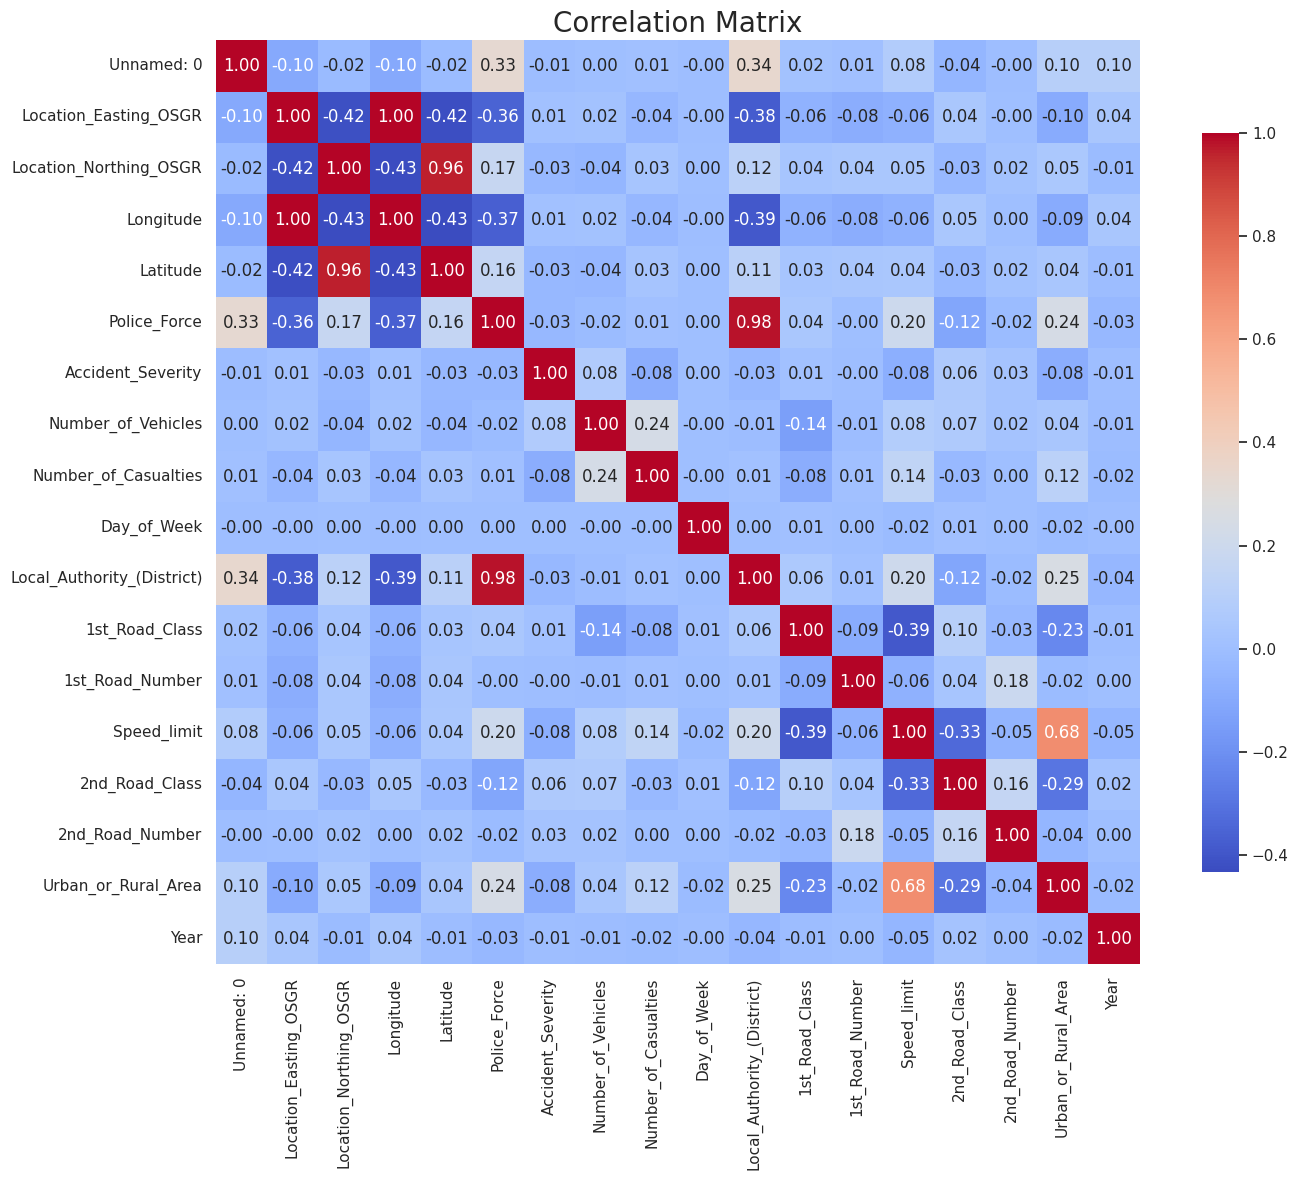

In [49]:
correlation_matrix = accident_severity_df.corr()

plt.figure(figsize=(16, 12))  # Adjust the dimensions as needed

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix', fontsize=20)

# Save the heatmap as an image
plt.savefig('correlation_matrix.png', dpi=500, bbox_inches='tight')

# Show the plot
plt.show()

<Axes: >

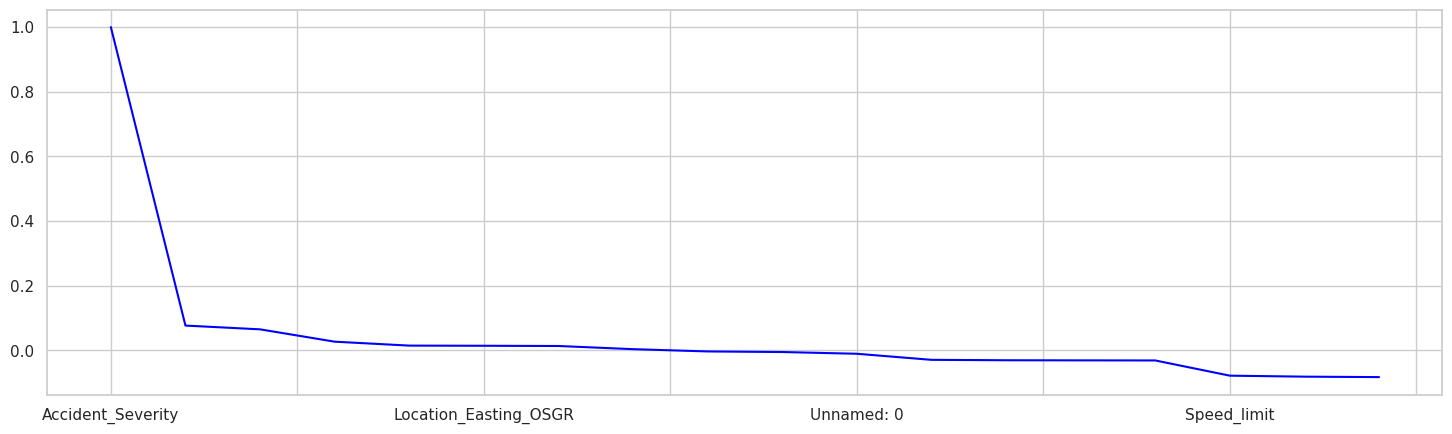

In [39]:
plt.figure(figsize=(18,5))
corr_matrix['Accident_Severity'].sort_values(ascending=False).plot(color='blue')

In [40]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x = "Longitude", y = "Latitude", color = "crimson", alpha = 0.2)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x = "Longitude", y = "Latitude", hue = "Accident_Severity", palette = "winter")
plt.show()

KeyboardInterrupt: 

In [ ]:
df.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = 0.5,
             s = df["Number_of_Casualties"]/100, label = "Number_of_Casualties", figsize=(15,15),
             c = "Accident_Severity", cmap = plt.get_cmap("YlGnBu"), colorbar= True
             )
plt.legend()

In [ ]:

# Specify the path to your CSV file
csv_file_path = '/kaggle/input/uk-dataset-accident-severity/UK_Accident.csv'  # Change to your actual file path

# Load the dataset
data = pd.read_csv(csv_file_path)

# Check the structure of the data
print(data.head())

# Convert the target column to a numeric format if needed
data['Accident_Severity'] = data['Accident_Severity'].astype(int)

# Check unique values in the target variable
print("Unique values in Accident_Severity:", data['Accident_Severity'].unique())

# Ensure your target variable contains valid class indices
max_class = data['Accident_Severity'].max()
print("Maximum class index in Accident_Severity:", max_class)

# Adjust the number of classes
num_classes = max_class + 1  # Ensure num_classes is one more than the highest index

# Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Ensure 'Accident_Severity' is excluded from categorical features if it exists
if 'Accident_Severity' in categorical_features:
    categorical_features.remove('Accident_Severity')  # Exclude the target variable

# Print the list of categorical features to debug
print("Categorical features after processing:", categorical_features)

# Create a preprocessor for handling categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=True), categorical_features)  # Updated parameter
    ],
    remainder='passthrough'  # Keep non-categorical features as is
)

# Split the data into features and target variable
X = data.drop(columns=['Accident_Severity'])
y = data['Accident_Severity']

# Preprocessing the data
X = preprocessor.fit_transform(X)

# Convert the sparse matrix to a dense format
X_dense = X.toarray()  # This converts to a dense matrix

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler(with_mean=True)  # or set with_mean=False if not centering
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test.values)

# Create a simple feedforward neural network
class SimpleResNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleResNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
input_size = X_train.shape[1]
model = SimpleResNet(input_size, num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5  # Adjust this as needed
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, preds = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test_tensor.numpy(), preds.numpy())
    print(f'Test Accuracy: {accuracy:.4f}')

# Define a wrapper function for the model to be compatible with SHAP
def model_predict(X):
    # Convert input to a PyTorch tensor
    X_tensor = torch.FloatTensor(X)
    with torch.no_grad():  # No need to calculate gradients
        return model(X_tensor).numpy()  # Return predictions as numpy array

# Explain model predictions with SHAP using the Kernel explainer
explainer = shap.KernelExplainer(model_predict, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test, nsamples="auto")

# Plot SHAP values for the test set
shap.initjs()
shap.summary_plot(shap_values, X_test)
